# Analítica Avanzada de Datos. - Práctica 1
---

Ahora es tu turno de analizar un banco de datos del mundo real que contiene datos de vuelos del Departamento de Transporte de Estados Unidos

Primero carga y visualiza los datos. (flights.csv)

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
import pandas as pd
import numpy as np

df = pd.read_csv(filepath_or_buffer='flights.csv')
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [ ]:
# percentiles_depd = np.percentile(df["DepDelay"], range(10, 90, 10))
# percentiles_depd

In [90]:
percentiles_arrdel = np.percentile(df["ArrDelay"], range(10, 90, 10))
percentiles_arrdel
df = df[(df["ArrDelay"] > percentiles_arrdel[0]) & (df["ArrDelay"] < percentiles_arrdel[7])]

El banco de datos contiene observaciones de los vuelos nacionales estadounidenses en 2013 y consta de los siguientes campos:
- **Año**: El año del vuelo (todos los registros son de 2013).
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)
- **Compañía aérea**: La abreviatura de dos letras de la compañía aérea.
- **OriginAirportID**: Identificador numérico único del aeropuerto de salida.
- **OriginAirportName**: El nombre completo del aeropuerto de salida
- **OriginCity** (Ciudad de origen): Ciudad del aeropuerto de salida
- **OriginState**: Estado del aeropuerto de salida Estado del aeropuerto de salida
- **DestAirportID**: Identificador numérico único del aeropuerto de destino
- **DestAirportName**: El nombre completo del aeropuerto de destino
- **DestCity**: La ciudad del aeropuerto de destino
- **DestState**: El estado del aeropuerto de destino
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **DelDelay15**: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la lleg

Lo que se tiene que hacer en esta práctica es explorar los datos de vuelo para analizar los posibles factores que afectan a los retrasos en la salida o llegada de un vuelo.

 1. Empieza con limpiar los datos.
     - Identifica los datos nulos o ausentes e imputa los valores de sustitución adecuados.
     - Identifica y elimina cualquier valor atípico en las columnas *DepDelay* y *ArrDelay*.
             - Tips: 
            - Primero visualiza la distribución de las columnas
            - Define donde se observan los valores atipicos 
            - Recorta los datos de tal forma que los percentiles esten entre 1 y 90
 2. Explora los datos limpios.
     - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
     - Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas:
         - *¿Cuáles son los promedios (mean) de salida y llegada?*
         - *¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?*
         - *¿Hay días de la semana más propensos a las llegadas que otros?*
         - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
         - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
         - *¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?*
         - *¿Qué ruta tiene el mayor retraso medio de llegada?*

In [139]:
values = list(set(data.aerolina.values))

In [93]:
primera_aerolina = data[data.aerolina == values[1]]

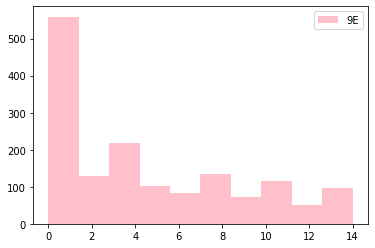

In [112]:
plt.hist(primera_aerolina['Minutos_tarde'][primera_aerolina['Minutos_tarde'] >=0], label=values[1], color='pink')
plt.legend()

In [210]:
from collections import Counter

# Obtenemos los datos con los que vamos a ocupar
data = pd.DataFrame({'aerolina':df.Carrier, 'Minutos_tarde':df.ArrDelay})


# Obtenemos el nombre de las aerolinas
values = list(set(data.aerolina.values))

# Iteramos sobre los nombres de cada aerolina
for nombre in values:
    # Obtenemos un auxiliar
    dataprim = data[data.aerolina == nombre]
    aux = dataprim['Minutos_tarde'][dataprim['Minutos_tarde'] >=0]
    
    cuenta = Counter(aux)
    # print(cuenta)
    minimo = min(cuenta.values())
    nombres = sorted([nombre for nombre, veces in cuenta.items() if veces == minimo])
    print(f'La aerolina {nombre} el maximo que se retrasa son: {nombres} minutos')

Counter({0: 92, 1: 81, 2: 62, 3: 51, 4: 48, 5: 41, 8: 40, 6: 31, 7: 28, 10: 24, 11: 23, 9: 21, 12: 19, 13: 17, 14: 9})
La aerolina HA el maximo que se retrasa son: [14] minutos
Counter({0: 421, 1: 138, 2: 128, 3: 112, 4: 105, 5: 103, 6: 83, 9: 73, 7: 73, 8: 62, 10: 59, 13: 58, 11: 57, 12: 52, 14: 38})
La aerolina 9E el maximo que se retrasa son: [14] minutos
Counter({0: 87, 1: 77, 2: 71, 4: 61, 5: 58, 6: 48, 8: 45, 3: 44, 10: 42, 13: 41, 11: 38, 14: 36, 7: 35, 9: 34, 12: 29})
La aerolina VX el maximo que se retrasa son: [12] minutos
Counter({0: 264, 1: 139, 2: 118, 4: 107, 5: 97, 3: 95, 8: 83, 6: 75, 7: 61, 10: 57, 9: 56, 11: 54, 12: 53, 13: 47, 14: 35})
La aerolina YV el maximo que se retrasa son: [14] minutos
Counter({0: 677, 1: 234, 2: 194, 6: 194, 5: 175, 3: 164, 4: 155, 7: 145, 10: 139, 11: 139, 9: 129, 8: 122, 14: 112, 12: 98, 13: 92})
La aerolina MQ el maximo que se retrasa son: [13] minutos
Counter({2: 115, 4: 106, 0: 103, 1: 100, 3: 92, 6: 82, 5: 76, 8: 74, 7: 74, 9: 62, 10: 5

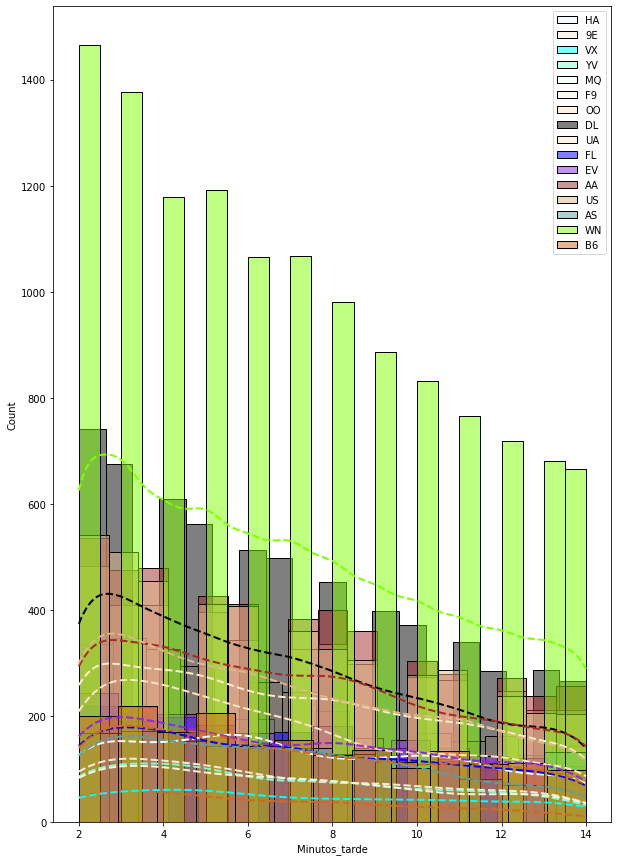

In [208]:
values = list(set(data.aerolina.values))
for color, aero in zip(mcolors.CSS4_COLORS, values):
    aerolinas = data[data.aerolina == aero]
    
    aux = aerolinas['Minutos_tarde'][ aerolinas['Minutos_tarde'] >=2]
    
    # fig, ax = plt.subplot()
    
    sns.histplot(x=aux, kde=True, line_kws={'linestyle' : 'dashed',
                                                     'linewidth' : '2'}, color=color, label=aero).lines[0].set_color(color)
    plt.legend()
    plt.rcParams["figure.figsize"] = (5,15)
    

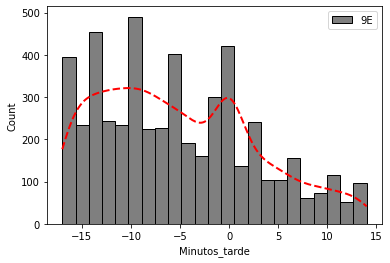

In [116]:
# plt.hist(primera_aerolina.Minutos_tarde)
sns.histplot(x=primera_aerolina.Minutos_tarde, kde=True, line_kws={'linestyle' : 'dashed',
                                                     'linewidth' : '2'}, color='black', label=values[1]).lines[0].set_color('red')
plt.legend()

In [ ]:
def plot_aerolina(data):
    values = list(set(data.aerolina.values))
    for 

In [2]:
#escribe tu código aqui
def comprobar_nulos(data):
    for col in data.columns:
        print(f'Columna: {col}, total de nulos: {df[col].isnull().sum()}')


comprobar_nulos(df)

Columna: Year, total de nulos: 0
Columna: Month, total de nulos: 0
Columna: DayofMonth, total de nulos: 0
Columna: DayOfWeek, total de nulos: 0
Columna: Carrier, total de nulos: 0
Columna: OriginAirportID, total de nulos: 0
Columna: OriginAirportName, total de nulos: 0
Columna: OriginCity, total de nulos: 0
Columna: OriginState, total de nulos: 0
Columna: DestAirportID, total de nulos: 0
Columna: DestAirportName, total de nulos: 0
Columna: DestCity, total de nulos: 0
Columna: DestState, total de nulos: 0
Columna: CRSDepTime, total de nulos: 0
Columna: DepDelay, total de nulos: 0
Columna: DepDel15, total de nulos: 2761
Columna: CRSArrTime, total de nulos: 0
Columna: ArrDelay, total de nulos: 0
Columna: ArrDel15, total de nulos: 0
Columna: Cancelled, total de nulos: 0


In [3]:
# value = np.zeros(shape=np.shape(df.DepDelay)[0])
aux = list()

for value in df.DepDelay:
    if value <=15:
        aux.append(0)
    else:
        aux.append(1)

aux = np.array(aux)

In [8]:
np.shape(np.where(df.DepDelay <= 15, 0, 1)) == np.shape(aux)

True

In [4]:
df['DepDel15'] = aux

In [5]:
comprobar_nulos(df)
df.head(5)

Columna: Year, total de nulos: 0
Columna: Month, total de nulos: 0
Columna: DayofMonth, total de nulos: 0
Columna: DayOfWeek, total de nulos: 0
Columna: Carrier, total de nulos: 0
Columna: OriginAirportID, total de nulos: 0
Columna: OriginAirportName, total de nulos: 0
Columna: OriginCity, total de nulos: 0
Columna: OriginState, total de nulos: 0
Columna: DestAirportID, total de nulos: 0
Columna: DestAirportName, total de nulos: 0
Columna: DestCity, total de nulos: 0
Columna: DestState, total de nulos: 0
Columna: CRSDepTime, total de nulos: 0
Columna: DepDelay, total de nulos: 0
Columna: DepDel15, total de nulos: 0
Columna: CRSArrTime, total de nulos: 0
Columna: ArrDelay, total de nulos: 0
Columna: ArrDel15, total de nulos: 0
Columna: Cancelled, total de nulos: 0


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
